In [ ]:
!pip install matplotlib --upgrade

     |████████████████████████████████| 10.3MB 3.6MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
from sklearn.metrics import mean_squared_error
from datetime import timedelta
from tqdm import tqdm
import pywt
import pandas_datareader.data as web
import plotly.express as px
import plotly.graph_objects as go
import datetime 
import math
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import string
from datetime import date
from dateutil.relativedelta import relativedelta
import collections
warnings.filterwarnings('ignore')


In [ ]:
sns.set(rc={'figure.figsize':(20, 7)})

In [ ]:
# Code to read csv file into Colaboratory:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()

drive = GoogleDrive(gauth)

In [ ]:
# Load dataset from google drive
id = '12PEBQdsc7PfOTb-7R12W1Or3nctzwzHU'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Predictions.xlsx')  

id_country = '1OswG8RitY-ySQ7TNXw_FKsPRVQ4STp9r'
downloaded_country = drive.CreateFile({'id':id_country}) 
downloaded_country.GetContentFile('Stock_vs_country.xlsx')  

In [ ]:
performace_df = pd.read_excel('Predictions.xlsx', sheet_name=None)

In [ ]:
stock_countries = pd.read_excel('Stock_vs_country.xlsx', index_col=0)

In [ ]:
def get_country_stokc(country_name):
  country_stocks = stock_countries[stock_countries.Country==country_name]["Stocks"].values
  return country_stocks

In [ ]:
france_stocks = get_country_stokc("France")
germany_stocks = get_country_stokc("Allemagne")
italy_stocks = get_country_stokc("Italie")
netherlands_stocks = get_country_stokc("Pays-Bas")
spain_stocks = get_country_stokc("Espagne")
portugal_stocks = get_country_stokc("Portugal")
finlande_stocks = get_country_stokc("Finlande")

In [ ]:
stock_list = list(performace_df.keys())

In [ ]:
stock_list

['GLANBIA PLC',
 'PUMA SE',
 'SARTORIUS AGPFD',
 'ATLANTIA SPA',
 'BIOMERIEUX',
 'HERMES INTL',
 'EUROFINS SCIEN',
 'SARTORIUS STEDIM',
 'CARL ZEISS MEBR',
 'LOREAL',
 'CORBION NV',
 'ANDRITZ AG',
 'IBERDROLA SA',
 'KONINKLIJKE PHIL',
 'ADIDAS AG',
 'EVOTEC SE',
 'EIFFAGE',
 'KERRY GROUPA',
 'RWE AG',
 'TELEPERFORMANCE',
 'KERING',
 'ACCIONA SA',
 'NEMETSCHEK SE',
 'ANHEUSERBUSCH I',
 'WARTSILA OYJ ABP',
 'EDP',
 'VINCI SA',
 'RED ELECTRICA',
 'DEUTSCHE BOERSE',
 'SCHNEIDER ELECTR',
 'SOITEC',
 'DASSAULT SYSTEME',
 'WOLTERS KLUWER',
 'SAP SE',
 'EON SE',
 'LVMH MOET HENNE',
 'QIAGEN NV',
 'DEUTSCHE WOHNEN',
 'DAVIDE CAMPARIM',
 'FERROVIAL SA',
 'GEA GROUP AG',
 'VISCOFAN',
 'PERNOD RICARD SA',
 'HENKEL AG PFD',
 'KPN KONIN NV',
 'ASML HOLDING NV',
 'NATURGY ENERGY',
 'KONE OYJB',
 'KINGSPAN GROUP',
 'ELIA GROUP SANV',
 'DSM KONIN',
 'ASM INTL NV',
 'UBISOFT ENTERTAI',
 'BE SEMICONDUCTOR',
 'SNAM SPA',
 'MERCK KGAA',
 'ENDESA',
 'SAFRAN SA',
 'RANDSTAD NV',
 'ALSTOM',
 'SEB SA',
 'DEUTS

In [ ]:
barda = performace_df['VALEO SA']
barda.index = barda['Date']
barda

,Date,Actual_VALEO SA,+6_VALEO SA,LSTM,GRU
Date,,,,,
2017-10-24,2017-10-24,-0.085404,2018-04-24,0.165869,0.280520
2017-10-25,2017-10-25,-0.054846,2018-04-25,0.233621,0.388515
2017-10-26,2017-10-26,-0.058703,2018-04-26,0.232692,0.388347
2017-10-27,2017-10-27,-0.063140,2018-04-27,0.104528,0.323202
2017-10-30,2017-10-30,-0.048077,2018-04-30,0.140387,0.427371
...,...,...,...,...,...
2020-09-30,2020-09-30,0.118095,2021-03-30,0.126903,0.212446
2020-10-01,2020-10-01,0.103540,2021-04-01,0.118375,0.208148
2020-10-06,2020-10-06,0.068389,2021-04-06,0.183419,0.259135


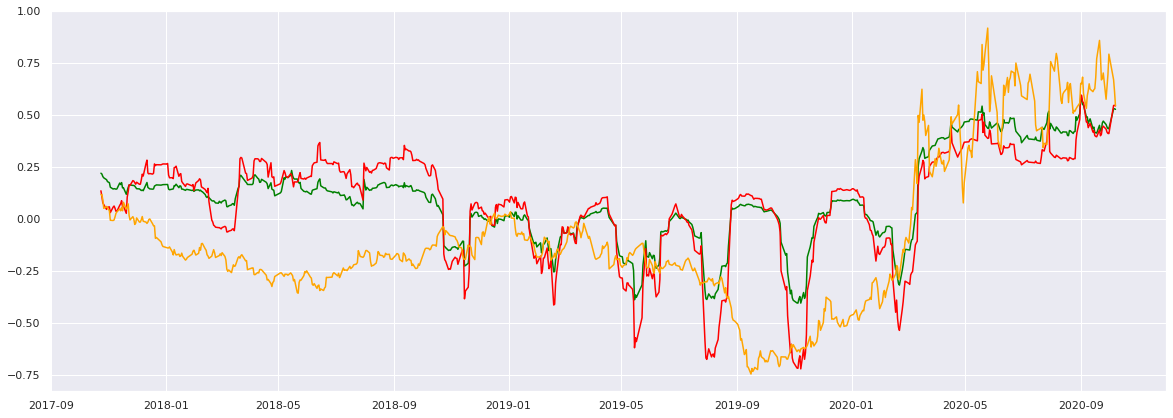

In [ ]:
plt.plot(barda['GRU'], color="green")
plt.plot(barda['LSTM'], color="red")
plt.plot(barda['Actual_RENAULT SA'], color="orange")

In [ ]:
def index_list(stock_list, list_of_stocks):
  my_list = []
  for stock in list_of_stocks:
    df = performace_df[stock]
    df.index = df['Date']
    my_list.append(df.index)
  return my_list

In [ ]:
dates_list = index_list(stock_list, france_stocks)

In [ ]:
# Applying intersection
res = list(set.intersection(*map(set, dates_list)))

# Result
print("The common elements among inners lists : ",res)
print('-------------')
print("The number of common elements among inners lists : ",len(res))

The common elements among inners lists :  [Timestamp('2020-10-01 00:00:00'), Timestamp('2020-04-16 00:00:00'), Timestamp('2020-09-08 00:00:00'), Timestamp('2020-04-29 00:00:00'), Timestamp('2020-07-20 00:00:00'), Timestamp('2020-09-02 00:00:00'), Timestamp('2020-09-14 00:00:00'), Timestamp('2020-04-02 00:00:00'), Timestamp('2020-08-06 00:00:00'), Timestamp('2020-04-17 00:00:00'), Timestamp('2020-09-10 00:00:00'), Timestamp('2020-04-30 00:00:00'), Timestamp('2020-05-29 00:00:00'), Timestamp('2020-06-23 00:00:00'), Timestamp('2020-04-03 00:00:00'), Timestamp('2020-07-30 00:00:00'), Timestamp('2020-07-15 00:00:00'), Timestamp('2020-03-12 00:00:00'), Timestamp('2020-06-19 00:00:00'), Timestamp('2020-05-22 00:00:00'), Timestamp('2020-03-27 00:00:00'), Timestamp('2020-05-08 00:00:00'), Timestamp('2020-04-08 00:00:00'), Timestamp('2020-06-15 00:00:00'), Timestamp('2020-08-25 00:00:00'), Timestamp('2020-10-06 00:00:00'), Timestamp('2020-06-18 00:00:00'), Timestamp('2020-07-16 00:00:00'), Times

In [ ]:
common_df = pd.DataFrame(index=res)
common_df = common_df.sort_index()

In [ ]:
for stock in france_stocks:
  ok = performace_df[stock]
  yes = ok[[ok.columns[1]]]
  hey = yes[yes.index.isin(res)]
  common_df[stock] = hey.iloc[:, 0]

In [ ]:
common_df

,BIOMERIEUX,HERMES INTL,EUROFINS SCIEN,SARTORIUS STEDIM,LOREAL,EIFFAGE,TELEPERFORMANCE,KERING,VINCI SA,SCHNEIDER ELECTR,SOITEC,DASSAULT SYSTEME,LVMH MOET HENNE,PERNOD RICARD SA,UBISOFT ENTERTAI,SAFRAN SA,ALSTOM,SEB SA,WENDEL,DANONE,CAPGEMINI SE,IPSEN,SANOFI,GECINA SA,ORANGE,DASSAULT AVIATIO,ILIAD SA,REMY COINTREAU,AIR LIQUIDE SA,EURAZEO SE,AIRBUS SE,SAINT GOBAIN,CREDIT AGRICOLE,SODEXO SA,ENGIE,ALTEN,BOUYGUES SA,CNP ASSURANCES,ESSILORLUXOTTICA,AXA,KLEPIERRE,THALES SA,ARCELORMITTAL,VIVENDI,RUBIS,ORPEA,STMICROELECTRONI,VEOLIA ENVIRONNE,NATIXIS,COVIVIO,BOLLORE,BNP PARIBAS,ATOS SE,SOPRA STERIA GRO,PUBLICIS GROUPE,CARREFOUR SA,TECHNIPFMC PLC,EDF,TOTAL SE,SOC GENERALE SA,SCOR SE,FAURECIA,MICHELIN,VALEO SA,RENAULT SA
2020-03-10,0.548139,0.230614,0.616346,0.696233,0.200939,-0.040931,0.251681,0.243249,0.028775,0.315204,0.512094,0.197785,0.207736,0.017500,0.134951,-0.081117,0.063521,0.260398,-0.106316,-0.005236,0.404630,0.780120,0.106163,-0.239810,-0.123283,-0.103188,0.335431,0.555087,0.261374,-0.102599,-0.225173,0.260962,0.126881,-0.137069,-0.091084,-0.119552,0.089382,-0.004386,0.044776,-0.020194,-0.368446,-0.191831,0.163061,0.160019,-0.087786,-0.010721,0.194787,-0.167732,-0.098039,-0.262364,0.153352,0.068582,0.206908,0.108696,-0.032897,0.053986,-0.228797,-0.224735,0.038712,-0.269591,-0.079305,0.189113,0.120992,0.603246,0.231454
2020-03-11,0.478788,0.249916,0.544742,0.746584,0.228559,-0.037362,0.284936,0.301254,0.007808,0.297153,0.658882,0.218104,0.261851,0.036781,0.200648,-0.055588,0.111751,0.289962,-0.083424,-0.008993,0.427173,0.816162,0.099334,-0.249489,-0.114179,-0.093108,0.321300,0.647190,0.257750,-0.062149,-0.196966,0.258367,0.079534,-0.121295,-0.075020,-0.080734,0.076105,0.011607,0.025276,-0.023535,-0.369669,-0.178580,0.163530,0.176131,-0.055391,0.002002,0.228240,-0.147527,-0.084034,-0.267683,0.164275,0.012619,0.212483,0.140625,-0.028069,0.033982,-0.237674,-0.209493,0.050057,-0.315531,-0.042874,0.214243,0.119916,0.686426,0.169496
2020-03-12,0.559105,0.327143,0.681225,0.891056,0.324883,0.134456,0.483410,0.484005,0.215317,0.508633,0.945228,0.325127,0.381758,0.149838,0.334775,0.135811,0.214173,0.388000,0.056568,0.083176,0.614511,1.096549,0.191993,-0.139844,-0.011863,0.023891,0.489150,0.770335,0.415753,0.037251,-0.035594,0.496000,0.292690,0.021046,0.117173,0.032990,0.301447,0.238251,0.104455,0.151742,-0.220444,-0.109371,0.427737,0.346556,0.070028,0.148594,0.461450,0.015789,0.159574,-0.130340,0.300481,0.164839,0.387588,0.292637,0.143653,0.184990,-0.096933,-0.060190,0.232563,-0.173935,0.193642,0.453484,0.309867,1.119181,0.498224
2020-03-13,0.453246,0.297486,0.486462,0.878424,0.306481,0.145970,0.486812,0.408889,0.149302,0.481379,0.881220,0.290083,0.322960,0.165848,0.305144,0.153061,0.202809,0.370187,0.043451,0.065848,0.670487,1.238546,0.192481,-0.114952,-0.011657,0.009421,0.539972,0.696275,0.347888,-0.012664,-0.074129,0.521302,0.242203,0.021046,0.123033,0.077419,0.247304,0.238928,0.114386,0.125897,-0.185701,-0.095943,0.340060,0.290391,-0.016478,0.183215,0.399835,0.056088,0.184139,-0.073302,0.314170,0.138040,0.407921,0.326004,0.141382,0.120875,-0.027057,-0.069457,0.249376,-0.251108,0.240551,0.458644,0.281308,1.100406,0.464671
2020-03-16,0.553337,0.383802,0.480700,1.020979,0.353565,0.292683,0.626551,0.588983,0.310298,0.522295,1.221043,0.478060,0.431956,0.155264,0.237155,0.307754,0.273333,0.443769,0.226013,0.076723,0.905522,1.318538,0.152089,0.005286,0.024888,0.206587,0.693095,0.792619,0.421084,0.172159,0.025942,0.886364,0.389931,0.176700,0.198136,0.241129,0.300330,0.421569,0.163712,0.273431,-0.054138,0.034032,0.544392,0.396699,0.041756,0.280175,0.630283,0.077230,0.342162,0.231527,0.519707,0.301385,0.512072,0.489205,0.301615,0.096348,0.028031,0.045122,0.322786,-0.106749,0.375626,0.542823,0.337842,1.352601,0.624055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [ ]:
def get_performance(common_dates, list_of_stocks):
  dataframe = pd.DataFrame(index=common_dates)
  perf_lstm = dataframe.copy()
  perf_gru = dataframe.copy()
  for stock in list_of_stocks:
    df = performace_df[stock]
    df.index = df['Date']
    gru = df[df.index.isin(perf_gru.index)]['GRU']
    lstm = df[df.index.isin(perf_lstm.index)]['LSTM']
    perf_gru[stock] = gru
    perf_lstm[stock] = lstm
  return perf_gru, perf_lstm

In [ ]:
perf_gru, perf_lstm = get_performance(res, france_stocks)

In [ ]:
perf_gru = perf_gru.sort_index()
perf_lstm = perf_lstm.sort_index()
actual_perf = common_df

In [ ]:
perf_lstm.head(4)

,BIOMERIEUX,HERMES INTL,EUROFINS SCIEN,SARTORIUS STEDIM,LOREAL,EIFFAGE,TELEPERFORMANCE,KERING,VINCI SA,SCHNEIDER ELECTR,SOITEC,DASSAULT SYSTEME,LVMH MOET HENNE,PERNOD RICARD SA,UBISOFT ENTERTAI,SAFRAN SA,ALSTOM,SEB SA,WENDEL,DANONE,CAPGEMINI SE,IPSEN,SANOFI,GECINA SA,ORANGE,DASSAULT AVIATIO,ILIAD SA,REMY COINTREAU,AIR LIQUIDE SA,EURAZEO SE,AIRBUS SE,SAINT GOBAIN,CREDIT AGRICOLE,SODEXO SA,ENGIE,ALTEN,BOUYGUES SA,CNP ASSURANCES,ESSILORLUXOTTICA,AXA,KLEPIERRE,THALES SA,ARCELORMITTAL,VIVENDI,RUBIS,ORPEA,STMICROELECTRONI,VEOLIA ENVIRONNE,NATIXIS,COVIVIO,BOLLORE,BNP PARIBAS,ATOS SE,SOPRA STERIA GRO,PUBLICIS GROUPE,CARREFOUR SA,TECHNIPFMC PLC,EDF,TOTAL SE,SOC GENERALE SA,SCOR SE,FAURECIA,MICHELIN,VALEO SA,RENAULT SA
2020-03-10,0.111971,0.215543,0.175158,0.134021,0.061270,0.176496,0.084181,-0.059341,0.038409,-0.031518,-0.052061,0.102377,0.058975,0.077615,0.351289,0.168665,0.016525,0.098895,0.134715,0.071824,0.086204,-0.054674,0.025130,0.146645,-0.015581,-0.208737,-0.026671,-0.049121,0.052477,-0.024391,0.242696,-0.112374,-0.209678,0.124169,0.016702,0.090851,-0.003446,0.133567,0.053757,0.053478,0.042275,0.099542,0.298222,-0.010186,0.153442,0.061427,0.138621,-0.029979,0.006272,0.175752,0.037066,-0.015767,-0.038641,0.065724,-0.055032,-0.152751,-0.219470,0.093709,0.256011,0.051379,0.237541,0.143405,0.119064,0.063654,-0.114653
2020-03-11,0.121740,0.215235,0.170981,0.125671,0.055762,0.179361,0.077912,-0.055195,0.037560,-0.032585,-0.056596,0.103564,0.062647,0.076727,0.342142,0.173238,0.014350,0.099530,0.111480,0.070880,0.091134,-0.037708,0.029010,0.148782,-0.015859,-0.123944,-0.015676,-0.045800,0.052626,-0.041715,0.245840,-0.115702,-0.205731,0.130226,0.027893,0.097322,-0.003767,0.137780,0.054101,0.053664,0.048211,0.076912,0.297482,-0.009504,0.156783,0.088945,0.147300,-0.069528,-0.036542,0.153980,0.034661,-0.022769,-0.038823,0.068410,-0.055195,-0.154739,-0.228631,0.074534,0.264555,0.020797,0.245124,0.137170,0.128122,0.058520,-0.106566
2020-03-12,0.118317,0.277688,0.180676,0.105575,0.051853,0.076683,0.088105,-0.062154,-0.026904,-0.017343,-0.031132,0.102772,0.089784,0.091098,0.368589,0.166191,0.021204,0.102368,-0.003362,0.071265,0.101368,-0.013616,0.036458,0.221136,0.011939,-0.081884,0.088403,-0.037369,0.059498,-0.064576,0.246078,-0.154147,-0.160839,0.129246,0.020657,0.104760,-0.010649,0.215442,0.056929,0.071455,0.038742,0.083687,0.407754,0.015175,0.174972,0.097277,0.199293,-0.158990,-0.047983,0.040614,0.104063,0.065544,0.009016,0.081569,0.004526,-0.141838,-0.261040,-0.067234,0.268115,0.110524,0.250062,0.105355,0.062851,0.071028,0.156916
2020-03-13,0.131115,0.261651,0.161674,0.105913,0.038468,0.075264,0.079492,-0.016160,-0.028499,-0.020842,-0.029955,0.101099,0.083109,0.080654,0.377025,0.174192,0.021520,0.106377,0.000448,0.065753,0.075861,0.026600,0.036244,0.208469,0.027069,-0.019606,0.112793,-0.032173,0.050755,-0.047188,0.171283,-0.159956,-0.156585,0.129158,0.023839,0.110020,-0.013953,0.217152,0.054585,0.069424,0.059893,0.071383,0.375014,0.036309,0.171502,0.097739,0.195362,-0.181556,-0.060437,0.037282,0.045046,0.062132,0.009071,0.078381,0.003691,-0.134464,-0.277839,-0.098097,0.268607,0.113660,0.258429,0.101714,0.068038,0.071186,0.206169


In [ ]:
perf_gru.head(4)

,BIOMERIEUX,HERMES INTL,EUROFINS SCIEN,SARTORIUS STEDIM,LOREAL,EIFFAGE,TELEPERFORMANCE,KERING,VINCI SA,SCHNEIDER ELECTR,SOITEC,DASSAULT SYSTEME,LVMH MOET HENNE,PERNOD RICARD SA,UBISOFT ENTERTAI,SAFRAN SA,ALSTOM,SEB SA,WENDEL,DANONE,CAPGEMINI SE,IPSEN,SANOFI,GECINA SA,ORANGE,DASSAULT AVIATIO,ILIAD SA,REMY COINTREAU,AIR LIQUIDE SA,EURAZEO SE,AIRBUS SE,SAINT GOBAIN,CREDIT AGRICOLE,SODEXO SA,ENGIE,ALTEN,BOUYGUES SA,CNP ASSURANCES,ESSILORLUXOTTICA,AXA,KLEPIERRE,THALES SA,ARCELORMITTAL,VIVENDI,RUBIS,ORPEA,STMICROELECTRONI,VEOLIA ENVIRONNE,NATIXIS,COVIVIO,BOLLORE,BNP PARIBAS,ATOS SE,SOPRA STERIA GRO,PUBLICIS GROUPE,CARREFOUR SA,TECHNIPFMC PLC,EDF,TOTAL SE,SOC GENERALE SA,SCOR SE,FAURECIA,MICHELIN,VALEO SA,RENAULT SA
2020-03-10,0.104006,0.184740,0.148426,0.081843,0.038464,0.232487,0.112057,-0.031054,0.050160,-0.037230,-0.034410,0.093598,0.040323,0.044444,0.227743,0.183237,0.050583,0.066715,0.087340,0.029593,0.036719,-0.068897,0.019908,0.096688,-0.008791,-0.107767,-0.007461,-0.029415,0.035505,-0.025122,0.202571,-0.005129,-0.170067,0.074440,-0.004335,0.059462,0.023947,0.076250,0.083670,0.012858,-0.040983,0.078784,0.366192,0.008329,0.102319,0.088670,0.165880,0.056706,-0.278631,0.148484,0.019870,0.046740,0.058326,0.034314,0.046240,-0.125431,-0.202011,0.071022,0.145400,0.020331,0.217445,0.150556,0.061211,0.034330,0.027464
2020-03-11,0.113085,0.183932,0.135778,0.084970,0.036012,0.234573,0.110636,-0.028592,0.050116,-0.037854,-0.044632,0.094397,0.042558,0.043067,0.219815,0.179022,0.048329,0.064831,0.080193,0.029482,0.038850,-0.053245,0.022053,0.098428,-0.009133,-0.086496,0.002876,-0.035448,0.032893,-0.034347,0.208044,-0.001867,-0.165366,0.082697,0.002403,0.066133,0.023714,0.079653,0.083818,0.013256,-0.032829,0.058854,0.363599,0.008832,0.111059,0.110627,0.167691,0.019508,-0.294477,0.125725,0.018623,0.044250,0.059254,0.037910,0.046805,-0.125313,-0.201628,0.051818,0.146989,-0.002173,0.222138,0.143784,0.064234,0.029419,0.031940
2020-03-12,0.112382,0.240120,0.147861,0.095673,0.034053,0.153378,0.140177,-0.009655,0.031981,-0.020675,-0.067311,0.096932,0.059804,0.043963,0.244619,0.170398,0.052207,0.060404,0.045399,0.025524,0.059438,-0.036185,0.030539,0.099050,0.007246,-0.079471,0.080989,-0.030984,0.024700,-0.039558,0.200208,-0.008218,-0.129656,0.083028,-0.013750,0.081436,0.028061,0.146257,0.085833,0.019026,-0.033827,0.064564,0.454553,0.026661,0.129963,0.114544,0.218388,-0.051169,-0.320754,0.037738,0.073689,0.110327,0.110958,0.060584,0.105330,-0.112575,-0.215945,-0.067042,0.174624,0.038924,0.244585,0.100114,0.025495,0.037785,0.253462
2020-03-13,0.124350,0.226893,0.131769,0.065927,0.027251,0.152478,0.133177,0.022965,0.032860,-0.023590,-0.062741,0.096051,0.056368,0.034374,0.251657,0.183745,0.052930,0.063993,0.045979,0.024719,0.049108,-0.000167,0.030438,0.094245,0.019093,-0.067028,0.093924,-0.025821,0.021167,-0.025598,0.156800,-0.009390,-0.124073,0.083106,-0.011200,0.087321,0.026465,0.147401,0.083819,0.016825,-0.010509,0.054780,0.428924,0.043846,0.129416,0.114910,0.215964,-0.064503,-0.331436,0.036419,0.025130,0.108318,0.112425,0.059288,0.104987,-0.100072,-0.221021,-0.075302,0.173674,0.044382,0.251074,0.095972,0.027665,0.038106,0.290100


In [ ]:
actual_perf.head(4)

,BIOMERIEUX,HERMES INTL,EUROFINS SCIEN,SARTORIUS STEDIM,LOREAL,EIFFAGE,TELEPERFORMANCE,KERING,VINCI SA,SCHNEIDER ELECTR,SOITEC,DASSAULT SYSTEME,LVMH MOET HENNE,PERNOD RICARD SA,UBISOFT ENTERTAI,SAFRAN SA,ALSTOM,SEB SA,WENDEL,DANONE,CAPGEMINI SE,IPSEN,SANOFI,GECINA SA,ORANGE,DASSAULT AVIATIO,ILIAD SA,REMY COINTREAU,AIR LIQUIDE SA,EURAZEO SE,AIRBUS SE,SAINT GOBAIN,CREDIT AGRICOLE,SODEXO SA,ENGIE,ALTEN,BOUYGUES SA,CNP ASSURANCES,ESSILORLUXOTTICA,AXA,KLEPIERRE,THALES SA,ARCELORMITTAL,VIVENDI,RUBIS,ORPEA,STMICROELECTRONI,VEOLIA ENVIRONNE,NATIXIS,COVIVIO,BOLLORE,BNP PARIBAS,ATOS SE,SOPRA STERIA GRO,PUBLICIS GROUPE,CARREFOUR SA,TECHNIPFMC PLC,EDF,TOTAL SE,SOC GENERALE SA,SCOR SE,FAURECIA,MICHELIN,VALEO SA,RENAULT SA
2020-03-10,0.548139,0.230614,0.616346,0.696233,0.200939,-0.040931,0.251681,0.243249,0.028775,0.315204,0.512094,0.197785,0.207736,0.017500,0.134951,-0.081117,0.063521,0.260398,-0.106316,-0.005236,0.404630,0.780120,0.106163,-0.239810,-0.123283,-0.103188,0.335431,0.555087,0.261374,-0.102599,-0.225173,0.260962,0.126881,-0.137069,-0.091084,-0.119552,0.089382,-0.004386,0.044776,-0.020194,-0.368446,-0.191831,0.163061,0.160019,-0.087786,-0.010721,0.194787,-0.167732,-0.098039,-0.262364,0.153352,0.068582,0.206908,0.108696,-0.032897,0.053986,-0.228797,-0.224735,0.038712,-0.269591,-0.079305,0.189113,0.120992,0.603246,0.231454
2020-03-11,0.478788,0.249916,0.544742,0.746584,0.228559,-0.037362,0.284936,0.301254,0.007808,0.297153,0.658882,0.218104,0.261851,0.036781,0.200648,-0.055588,0.111751,0.289962,-0.083424,-0.008993,0.427173,0.816162,0.099334,-0.249489,-0.114179,-0.093108,0.321300,0.647190,0.257750,-0.062149,-0.196966,0.258367,0.079534,-0.121295,-0.075020,-0.080734,0.076105,0.011607,0.025276,-0.023535,-0.369669,-0.178580,0.163530,0.176131,-0.055391,0.002002,0.228240,-0.147527,-0.084034,-0.267683,0.164275,0.012619,0.212483,0.140625,-0.028069,0.033982,-0.237674,-0.209493,0.050057,-0.315531,-0.042874,0.214243,0.119916,0.686426,0.169496
2020-03-12,0.559105,0.327143,0.681225,0.891056,0.324883,0.134456,0.483410,0.484005,0.215317,0.508633,0.945228,0.325127,0.381758,0.149838,0.334775,0.135811,0.214173,0.388000,0.056568,0.083176,0.614511,1.096549,0.191993,-0.139844,-0.011863,0.023891,0.489150,0.770335,0.415753,0.037251,-0.035594,0.496000,0.292690,0.021046,0.117173,0.032990,0.301447,0.238251,0.104455,0.151742,-0.220444,-0.109371,0.427737,0.346556,0.070028,0.148594,0.461450,0.015789,0.159574,-0.130340,0.300481,0.164839,0.387588,0.292637,0.143653,0.184990,-0.096933,-0.060190,0.232563,-0.173935,0.193642,0.453484,0.309867,1.119181,0.498224
2020-03-13,0.453246,0.297486,0.486462,0.878424,0.306481,0.145970,0.486812,0.408889,0.149302,0.481379,0.881220,0.290083,0.322960,0.165848,0.305144,0.153061,0.202809,0.370187,0.043451,0.065848,0.670487,1.238546,0.192481,-0.114952,-0.011657,0.009421,0.539972,0.696275,0.347888,-0.012664,-0.074129,0.521302,0.242203,0.021046,0.123033,0.077419,0.247304,0.238928,0.114386,0.125897,-0.185701,-0.095943,0.340060,0.290391,-0.016478,0.183215,0.399835,0.056088,0.184139,-0.073302,0.314170,0.138040,0.407921,0.326004,0.141382,0.120875,-0.027057,-0.069457,0.249376,-0.251108,0.240551,0.458644,0.281308,1.100406,0.464671


# Performance Analysis

In [ ]:
relevant_dates = []
perf_gru["Month-year"] = perf_gru.index.to_period('M')
for i in perf_gru.index.to_period('M').unique():
  relevant_dates.append(perf_gru[perf_gru["Month-year"]==i].last_valid_index())

In [ ]:
relevant_lstm = perf_lstm[perf_lstm.index.isin(relevant_dates)]
relevant_gru = perf_gru[perf_gru.index.isin(relevant_dates)]
del relevant_gru["Month-year"]
relevant_actual = common_df[common_df.index.isin(relevant_dates)]

In [ ]:
relevant_actual.head(3)

,BIOMERIEUX,HERMES INTL,EUROFINS SCIEN,SARTORIUS STEDIM,LOREAL,EIFFAGE,TELEPERFORMANCE,KERING,VINCI SA,SCHNEIDER ELECTR,SOITEC,DASSAULT SYSTEME,LVMH MOET HENNE,PERNOD RICARD SA,UBISOFT ENTERTAI,SAFRAN SA,ALSTOM,SEB SA,WENDEL,DANONE,CAPGEMINI SE,IPSEN,SANOFI,GECINA SA,ORANGE,DASSAULT AVIATIO,ILIAD SA,REMY COINTREAU,AIR LIQUIDE SA,EURAZEO SE,AIRBUS SE,SAINT GOBAIN,CREDIT AGRICOLE,SODEXO SA,ENGIE,ALTEN,BOUYGUES SA,CNP ASSURANCES,ESSILORLUXOTTICA,AXA,KLEPIERRE,THALES SA,ARCELORMITTAL,VIVENDI,RUBIS,ORPEA,STMICROELECTRONI,VEOLIA ENVIRONNE,NATIXIS,COVIVIO,BOLLORE,BNP PARIBAS,ATOS SE,SOPRA STERIA GRO,PUBLICIS GROUPE,CARREFOUR SA,TECHNIPFMC PLC,EDF,TOTAL SE,SOC GENERALE SA,SCOR SE,FAURECIA,MICHELIN,VALEO SA,RENAULT SA
2020-03-30,0.335329,0.150672,0.596690,0.649496,0.127081,0.057879,0.466073,0.178816,-0.020274,0.338677,0.865152,0.202032,0.141143,0.041300,0.126279,-0.005418,0.140254,0.300562,0.050882,-0.033263,0.407051,0.896442,0.059868,-0.073952,-0.207493,0.028369,0.235155,0.527451,0.203375,0.123541,0.018710,0.679179,0.115557,0.025891,0.208466,0.270588,0.075917,0.224771,0.168276,0.028020,-0.344365,-0.121096,0.427461,0.309131,-0.129639,0.039743,0.352744,-0.066160,-0.383617,0.145853,0.322822,0.096460,0.146285,0.507504,0.182169,-0.038353,-0.088113,0.297585,-0.130176,-0.266779,0.179462,0.378126,0.199268,0.810345,0.289807
2020-04-30,0.127979,0.196466,0.354059,0.486758,0.046740,-0.165730,0.260147,0.126684,-0.092102,0.248502,0.451728,0.097342,0.141439,-0.005032,0.115135,0.074804,0.029981,0.271402,-0.046154,-0.250711,0.156286,0.153506,-0.132526,-0.104954,-0.135159,-0.038926,0.220588,0.424361,0.080965,-0.105818,0.081375,0.383726,-0.068662,-0.240000,0.048566,0.044901,0.001423,0.025995,-0.057257,-0.147938,-0.410729,-0.191785,0.164967,0.258056,-0.312012,-0.155271,0.103754,-0.179369,-0.076354,-0.105862,0.270025,0.041151,-0.099293,-0.056429,0.098415,-0.010004,-0.411202,0.370360,-0.214003,-0.183731,-0.188327,-0.015729,0.039731,0.226736,0.173920
2020-05-29,-0.075910,0.101097,0.110727,0.204266,0.180985,0.026585,0.290474,0.290886,0.059489,0.316114,0.674685,0.020033,0.322667,0.139900,0.132644,0.432565,0.287930,0.211508,0.135593,-0.142625,0.300217,0.131542,-0.026505,0.098531,-0.014292,0.166884,0.095960,0.398876,0.131040,0.187215,0.587302,0.386309,0.260736,0.209118,0.177245,0.277008,0.226580,0.425701,0.044924,0.204640,0.137324,0.161093,0.777339,0.242780,-0.134266,-0.007102,0.504753,0.005588,0.333166,0.367521,0.268901,0.358704,0.125922,0.198869,0.507053,0.006957,0.142163,0.632730,0.121190,0.309553,0.308386,0.232545,0.191393,0.513318,0.688443


In [ ]:
def get_best_per_month(dataframe, nb_stocks):
  my_dict = {}
  for date in dataframe.index:
    row = dataframe.loc[date].sort_values(ascending=False)[:nb_stocks]
    df = pd.DataFrame(row.values, index = row.index, columns=["Performance"])
    df['Stocks'] = df.index
    df = df.reset_index(drop=True)
    df = df[df.columns.to_list()[::-1]]
    my_dict[date] = df
  return my_dict

In [ ]:
performance_dict_gru = get_best_per_month(relevant_gru, 10)
performance_dict_lstm = get_best_per_month(relevant_lstm, 10)
performance_dict_actual = get_best_per_month(relevant_actual, 10)

In [ ]:
df_performance_actual = pd.concat(performance_dict_actual, axis=1, ignore_index=False)
df_performance_lstm = pd.concat(performance_dict_lstm, axis=1, ignore_index=False)
df_performance_gru = pd.concat(performance_dict_gru, axis=1, ignore_index=False)

In [ ]:
df_performance_actual

2020-03-30              ...       2020-10-08            
             Stocks Performance  ...           Stocks Performance
0             IPSEN    0.896442  ...    ARCELORMITTAL    0.981484
1            SOITEC    0.865152  ...          NATIXIS    0.884058
2          VALEO SA    0.810345  ...  SOC GENERALE SA    0.766714
3      SAINT GOBAIN    0.679179  ...  PUBLICIS GROUPE    0.751009
4  SARTORIUS STEDIM    0.649496  ...        KLEPIERRE    0.619122
5    EUROFINS SCIEN    0.596690  ...  CREDIT AGRICOLE    0.610440
6    REMY COINTREAU    0.527451  ...       RENAULT SA    0.544124
7  SOPRA STERIA GRO    0.507504  ...      BNP PARIBAS    0.542112
8   TELEPERFORMANCE    0.466073  ...   CNP ASSURANCES    0.530678
9     ARCELORMITTAL    0.427461  ...        AIRBUS SE    0.506276

[10 rows x 16 columns]

In [ ]:
df_performance_lstm

2017-10-31              ...       2020-10-08            
            Stocks Performance  ...           Stocks Performance
0    INTERPUMP SPA    0.194557  ...     ATLANTIA SPA    0.366228
1     AMPLIFON SPA    0.187256  ...     LEONARDO SPA    0.280751
2    RECORDATI SPA    0.132018  ...       TENARIS SA    0.248968
3       TENARIS SA    0.108501  ...       MEDIOBANCA    0.192396
4  INTESA SANPAOLO    0.091532  ...    RECORDATI SPA    0.185203
5          A2A SPA    0.086173  ...    INTERPUMP SPA    0.178871
6         ENEL SPA    0.067205  ...     AMPLIFON SPA    0.174002
7       MEDIOBANCA    0.053816  ...         SNAM SPA    0.165460
8        TERNA SPA    0.042725  ...  DAVIDE CAMPARIM    0.134050
9  DAVIDE CAMPARIM    0.042121  ...        TERNA SPA    0.129264

[10 rows x 74 columns]

### Start analysis here


In [ ]:
def prediction_analysis():
  return None

In [ ]:
period_gru = df_performance_gru[[df_performance_gru.columns[0], df_performance_gru.columns[1]]]
period_gru

2017-10-31            
            Stocks Performance
0    RECORDATI SPA    0.144833
1    INTERPUMP SPA    0.138203
2     AMPLIFON SPA    0.136547
3         ENEL SPA    0.115560
4    UNICREDIT SPA    0.110427
5       TENARIS SA    0.085052
6          A2A SPA    0.076771
7  INTESA SANPAOLO    0.066592
8        TERNA SPA    0.052903
9   GENERALI ASSIC    0.042990

In [ ]:
period_lstm = df_performance_lstm[[df_performance_lstm.columns[0], df_performance_lstm.columns[1]]]
period_lstm

2017-10-31            
            Stocks Performance
0    INTERPUMP SPA    0.194557
1     AMPLIFON SPA    0.187256
2    RECORDATI SPA    0.132018
3       TENARIS SA    0.108501
4  INTESA SANPAOLO    0.091532
5          A2A SPA    0.086173
6         ENEL SPA    0.067205
7       MEDIOBANCA    0.053816
8        TERNA SPA    0.042725
9  DAVIDE CAMPARIM    0.042121

In [ ]:
actual_lstm = pd.DataFrame(relevant_actual.iloc[0])
actual_lstm.columns = ['Performance']
actual_lstm = actual_lstm[actual_lstm.index.isin(period_lstm[period_lstm.columns[0]].values)]
actual_lstm

,Performance
DAVIDE CAMPARIM,-0.095930
AMPLIFON SPA,0.188650
ENEL SPA,-0.010704
TERNA SPA,-0.039189
INTERPUMP SPA,-0.087513
RECORDATI SPA,-0.257078
A2A SPA,0.130508
MEDIOBANCA,0.069607
INTESA SANPAOLO,0.093902
TENARIS SA,0.325106


In [ ]:
actual_gru = pd.DataFrame(relevant_actual.iloc[0])
actual_gru.columns = ['Performance']
actual_gru = actual_gru[actual_gru.index.isin(period_gru[period_gru.columns[0]].values)]
actual_gru

,Performance
AMPLIFON SPA,0.188650
ENEL SPA,-0.010704
TERNA SPA,-0.039189
GENERALI ASSIC,0.070332
INTERPUMP SPA,-0.087513
RECORDATI SPA,-0.257078
A2A SPA,0.130508
INTESA SANPAOLO,0.093902
TENARIS SA,0.325106
UNICREDIT SPA,0.093974


In [ ]:
def bar_plot(df_observed, df_predicted, model):
  labels = df_observed.index
  actual_model_values = df_observed['Performance'].values
  predicted_model_values = df_predicted[df_predicted.columns[1]].values
  x = np.arange(len(labels))  # the label locations
  width = 0.35  # the width of the bars

  fig, ax = plt.subplots()
  rects1 = ax.bar(x - width/2, actual_model_values, width, label='Actual')
  rects2 = ax.bar(x + width/2, predicted_model_values, width, label='Prediction') 

  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel('Performance')
  ax.set_title(model + ' ' + 'Performance Actual vs Prediction')
  ax.set_xticks(x)
  ax.set_xticklabels(labels)
  ax.legend()


  ax.bar_label(rects1, padding=3)
  ax.bar_label(rects2, padding=3)
  fig.tight_layout()

  plt.show()


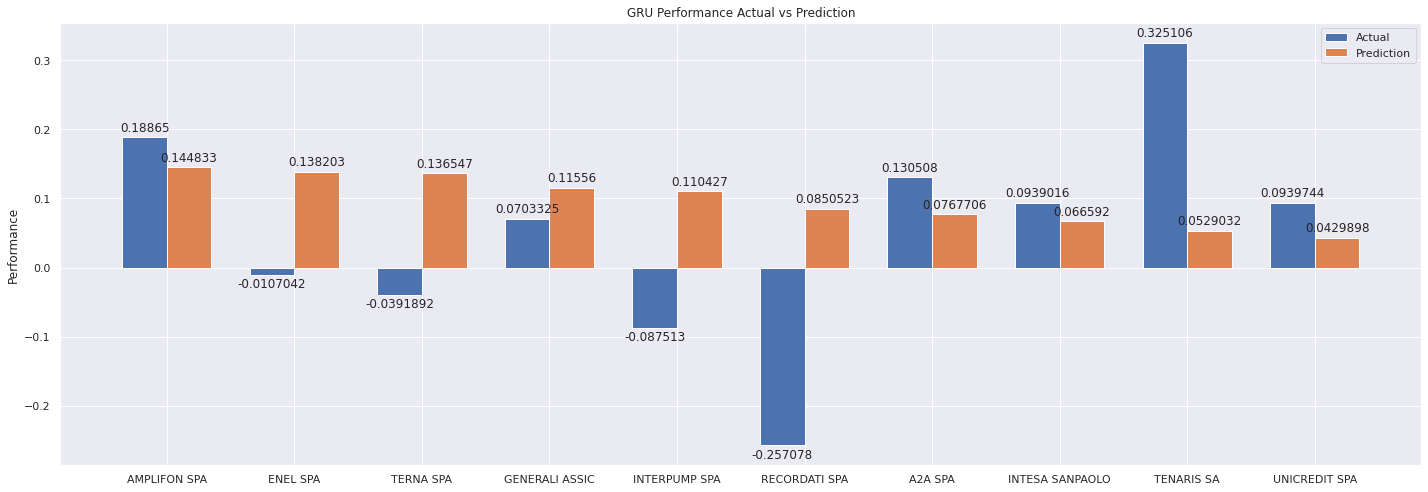

In [ ]:
bar_plot(actual_gru, period_gru, "GRU")

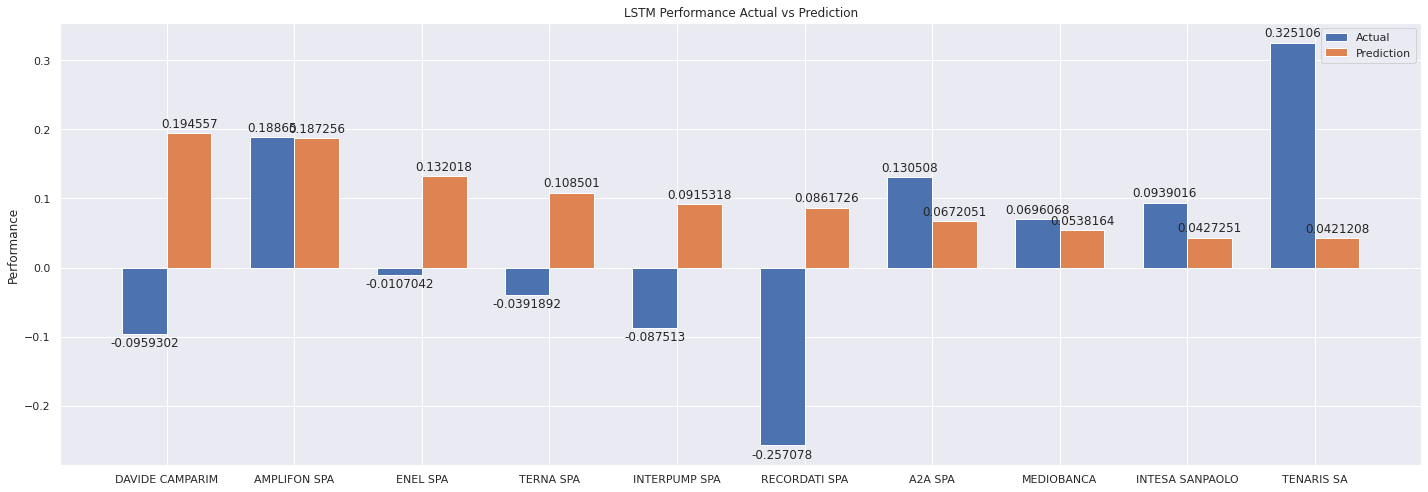

In [ ]:
bar_plot(actual_lstm, period_lstm, "LSTM")

In [ ]:
base = 50
perf_list = {"LSTM" : {}, "Actual" : {}}
for index, col in enumerate(df_performance_lstm.columns):
  if index % 2 !=0:
    perf_list["LSTM"][col[0]] = (df_performance_lstm[col].sum() + 10)*base
    perf_list["Actual"][col[0]] = (relevant_actual[performance_dict_lstm[col[0]]['Stocks']].loc[col[0]].sum() + 10) *base

<AxesSubplot:>

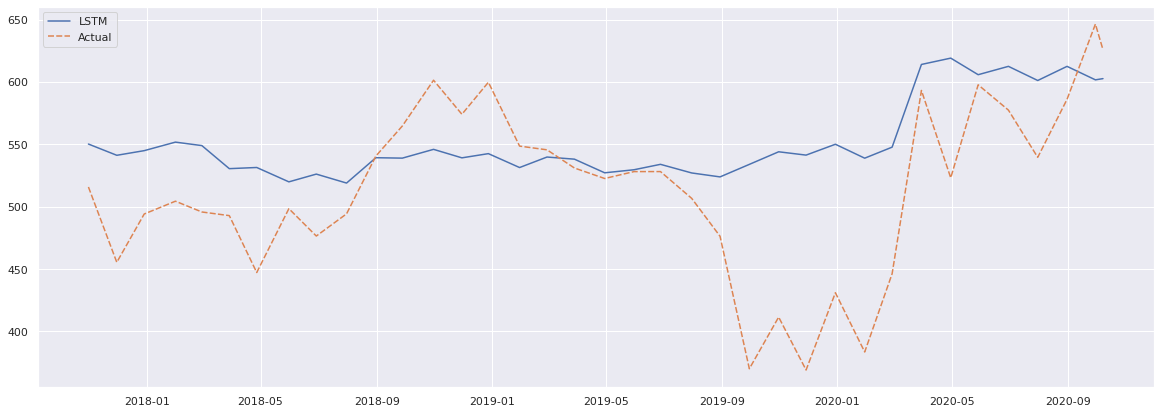

In [ ]:
sns.lineplot(data = pd.DataFrame(perf_list))

In [ ]:
base = 50
perf_list_gru = {"GRU" : {}, "Actual" : {}}
for index, col in enumerate(df_performance_gru.columns):
  if index % 2 !=0:
    perf_list_gru["GRU"][col[0]] = (df_performance_gru[col].sum() + 10)*base
    perf_list_gru["Actual"][col[0]] = (relevant_actual[performance_dict_gru[col[0]]['Stocks']].loc[col[0]].sum() + 10) *base

<AxesSubplot:>

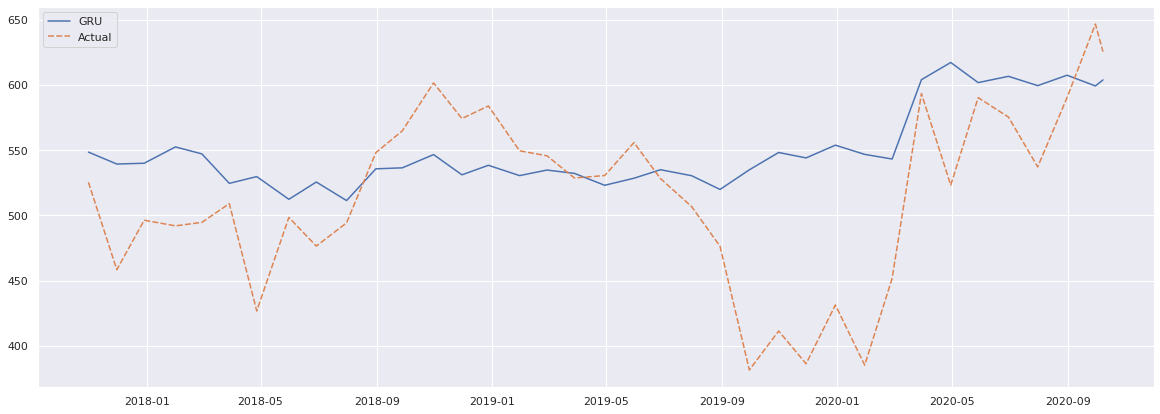

In [ ]:
sns.lineplot(data = pd.DataFrame(perf_list_gru))